<a href="https://colab.research.google.com/github/ds4geo/ds4geo/blob/master/WS%202020%20Course%20Notes/Session%208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science for Geoscientists - Winter Semester 2020**
# **Session 8 - Unsupervised Machine Learning - 25th November 2020**

Unsupervised ML
PCA, clustering

# Part 8.1 - Introduction to Machine Learning - *mini-lecture*


# Part 8.2 - Unsupervised Machine Learning - *mini-lecture*
Machine learning from un-labelled data


* Dimensionality reduction
* Clustering

# Part 8.3 - XRF Core Scan data excercise

## Part 8.3.1 - Introduction to XRF core scan data - *mini-lecture*

UPDATE
* counts of various elements on track through core.
* Difficult to calibrate - water content, density, grain size etc.
* CLR - why?
* Standardization

## Part 8.3.2 - Preparing the data - *walkthrough*
* Load the data ("https://raw.githubusercontent.com/ds4geo/ds4geo/master/student_submitted_data/20201013_MHL-11-02-Steven_Huang.txt")
* Plot the data
* Centered log ratio
* Standardize

In [1]:
#!pip install -U plotly

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import gmean
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Load the data
xrf = pd.read_csv("https://raw.githubusercontent.com/ds4geo/ds4geo/master/student_submitted_data/20201013_MHL-11-02-Steven_Huang.txt",header=6, sep="\t")
xrf

,correaltion depth(mm),Age (CE),sample surface,validity,kcps,MSE,Al,Si,P,S,Cl,Ar,K,Ca,Ti,V,Cr,Mn,Fe,Ni,Cu,Zn,Rb,Sr,Zr,Ba,Pb,Mo_inc,Mo_coh,inc_coh
0,10.01,2008.239753,5.83,1,31967.33594,1.05,0,179,21,0,15,161,2138,278,2228,150,212,927,90044,190,203,630,1269,819,289,100,176,40112,8539,4.697506
1,10.21,2008.181045,5.83,1,31737.14844,1.14,0,159,28,0,20,175,2291,236,2168,96,174,945,92623,211,61,625,1187,549,131,114,104,40695,8291,4.908334
2,10.41,2008.122337,5.83,1,31722.21680,1.11,7,185,22,0,29,157,2403,299,2370,90,216,1038,94421,425,170,677,1333,863,300,135,169,40500,8257,4.904929
3,10.61,2008.063629,5.84,1,31913.80273,1.13,20,209,6,17,7,178,2438,318,2354,88,213,1012,93748,266,134,758,1422,628,33,119,153,39503,8153,4.845210
4,10.81,2008.004921,5.85,1,31672.57227,1.01,10,255,26,25,41,247,2617,314,2637,124,151,938,96160,347,52,600,1140,624,76,79,125,40363,8351,4.833313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3103,630.61,1725.110279,6.88,1,29876.73633,1.10,41,438,14,0,20,208,4276,445,3962,83,262,1794,143487,314,304,800,1723,1048,691,215,299,24382,6890,3.538752
3104,630.81,1725.006291,6.88,1,30109.86523,1.04,48,425,22,10,0,229,4130,472,3862,189,240,1776,141284,194,252,813,1752,1064,500,251,282,24448,6993,3.496067
3105,631.01,1724.902303,6.88,1,30407.06445,1.00,55,425,15,7,10,237,4165,459,3899,93,214,1654,140623,289,181,827,1839,979,701,184,319,24950,7064,3.531993
3106,631.21,1724.798315,6.88,1,30606.98438,1.03,35,413,10,0,17,236,4115,394,3722,118,194,1483,137079,174,204,711,1750,879,674,234,227,25213,7067,3.567709


In [4]:
# Select just the element data
xrf.index = xrf["correaltion depth(mm)"]
ele = xrf.loc[:, "Al": "Pb"]
ele

,Al,Si,P,S,Cl,Ar,K,Ca,Ti,V,Cr,Mn,Fe,Ni,Cu,Zn,Rb,Sr,Zr,Ba,Pb
correaltion depth(mm),,,,,,,,,,,,,,,,,,,,,
10.01,0,179,21,0,15,161,2138,278,2228,150,212,927,90044,190,203,630,1269,819,289,100,176
10.21,0,159,28,0,20,175,2291,236,2168,96,174,945,92623,211,61,625,1187,549,131,114,104
10.41,7,185,22,0,29,157,2403,299,2370,90,216,1038,94421,425,170,677,1333,863,300,135,169
10.61,20,209,6,17,7,178,2438,318,2354,88,213,1012,93748,266,134,758,1422,628,33,119,153
10.81,10,255,26,25,41,247,2617,314,2637,124,151,938,96160,347,52,600,1140,624,76,79,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630.61,41,438,14,0,20,208,4276,445,3962,83,262,1794,143487,314,304,800,1723,1048,691,215,299
630.81,48,425,22,10,0,229,4130,472,3862,189,240,1776,141284,194,252,813,1752,1064,500,251,282
631.01,55,425,15,7,10,237,4165,459,3899,93,214,1654,140623,289,181,827,1839,979,701,184,319


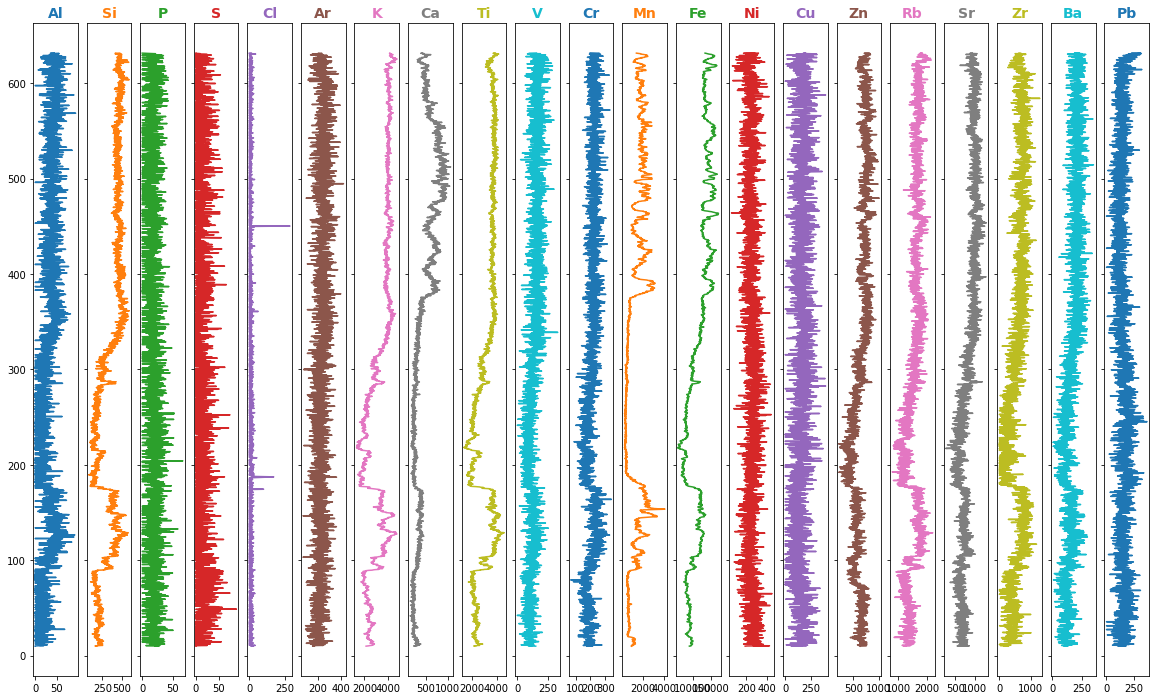

In [5]:
# Make a quick overview plot
fig, ax = plt.subplots(ncols=ele.shape[1], figsize=(20,12), sharey="all")
# plot each element
for (i, a), (l, d) in zip(enumerate(ax), ele.iteritems()):
  a.plot(d.values, d.index, label=l, color="C{}".format(i))
  a.set_title(l, fontdict={"color": "C{}".format(i), "fontweight": "bold", "fontsize":14})

In [6]:
# Select elements with signal which are never 0
elements = ["Si", "Ar", "K", "Ca", "Ti", "Cr", "Mn", "Fe", "Ni", "Zn", "Rb" ,"Sr", "Ba"]
edf = ele.loc[:,elements]


In [7]:
# Apply centered log ratio
clr = np.log(edf / gmean(edf))
clr

,Si,Ar,K,Ca,Ti,Cr,Mn,Fe,Ni,Zn,Rb,Sr,Ba
correaltion depth(mm),,,,,,,,,,,,,
10.01,-0.601069,-0.352650,-0.401943,-0.373334,-0.333168,0.022516,-0.146332,-0.233777,-0.251973,-0.003304,-0.195726,-0.002074,-0.456922
10.21,-0.719550,-0.269268,-0.332825,-0.537123,-0.360468,-0.175015,-0.127100,-0.205538,-0.147139,-0.011272,-0.262527,-0.402060,-0.325894
10.41,-0.568099,-0.377808,-0.285096,-0.300512,-0.271383,0.041208,-0.033234,-0.186312,0.553092,0.068648,-0.146524,0.050256,-0.156818
10.61,-0.446120,-0.252271,-0.270636,-0.238904,-0.278157,0.027221,-0.058602,-0.193465,0.084499,0.181660,-0.081891,-0.267618,-0.282969
10.81,-0.247191,0.075334,-0.199785,-0.251562,-0.164631,-0.316791,-0.134535,-0.168062,0.350328,-0.052094,-0.302927,-0.274008,-0.692645
...,...,...,...,...,...,...,...,...,...,...,...,...,...
630.61,0.293764,-0.096516,0.291204,0.097119,0.242476,0.234274,0.513918,0.232169,0.250396,0.235588,0.110111,0.244480,0.308545
630.81,0.263635,-0.000332,0.256464,0.156024,0.216913,0.146568,0.503834,0.216697,-0.231139,0.251707,0.126802,0.259632,0.463360
631.01,0.263635,0.034006,0.264902,0.128095,0.226448,0.031905,0.432666,0.212007,0.167430,0.268781,0.175266,0.176373,0.152843


In [8]:
# Standardize
sxrf = StandardScaler().fit_transform(X=clr)
sxrf = pd.DataFrame(sxrf, index=clr.index, columns=clr.columns)
sxrf

,Si,Ar,K,Ca,Ti,Cr,Mn,Fe,Ni,Zn,Rb,Sr,Ba
correaltion depth(mm),,,,,,,,,,,,,
10.01,-1.340646,-1.529672,-1.349660,-0.797131,-1.295386,0.124040,-0.227179,-0.947487,-1.057240,-0.014589,-1.239950,-0.008587,-1.055241
10.21,-1.604912,-1.167992,-1.117574,-1.146848,-1.401527,-0.964179,-0.197323,-0.833036,-0.617372,-0.049776,-1.663136,-1.664440,-0.752637
10.41,-1.267109,-1.638801,-0.957306,-0.641643,-1.055158,0.227017,-0.051596,-0.755114,2.320692,0.303140,-0.928244,0.208050,-0.362163
10.61,-0.995043,-1.094262,-0.908752,-0.510100,-1.081496,0.149966,-0.090979,-0.784105,0.354547,0.802188,-0.518791,-1.107881,-0.653504
10.81,-0.551344,0.326773,-0.670847,-0.537127,-0.640098,-1.745235,-0.208865,-0.681147,1.469923,-0.230041,-1.919080,-1.134333,-1.599630
...,...,...,...,...,...,...,...,...,...,...,...,...,...
630.61,0.655223,-0.418654,0.977817,0.207365,0.942768,1.290639,0.797854,0.940971,1.050624,1.040329,0.697568,1.012096,0.712571
630.81,0.588021,-0.001441,0.861164,0.333137,0.843374,0.807460,0.782198,0.878262,-0.969824,1.111511,0.803307,1.074821,1.070108
631.01,0.588021,0.147506,0.889500,0.273504,0.880447,0.175770,0.671712,0.859256,0.702510,1.186905,1.110332,0.730147,0.352984


In [9]:
# Plot standardized data with plotly
sxrf.plot(y=["Si", "Mn", "Ca", "K"], width=1200, height=400, backend="plotly")

# PCA lecture

# Part 8.4 - Principle Component Analysis

## Part 8.4.1 - Introduction to PCA - *mini-lecture*

Dimensionality reduction


## Part 8.4.2 - applying PCA to the XRF core scan data - *walkthrough*
* Apply (fit) the PCA
* Look at the explained variance
* Transform the data into PC space
* Plot the transformed data

In [11]:
# Create and fit the PCA - i.e calculate the rotation/transformation/vectors
pca = PCA()
pca.fit(clr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
# variance explained by each component of the PCA
pca.explained_variance_

array([1.04673425, 0.16261003, 0.07863417, 0.05608593, 0.05328064,
       0.04619141, 0.02500821, 0.01818148, 0.01384488, 0.00806207,
       0.00427113, 0.00237825, 0.00112079])

In [19]:
# variance explained by each component as a ratio of total variance
evr = pca.explained_variance_ratio_
for i,v in enumerate(evr):
  ev = round(v*100,1)
  print("Principle Component {} explains {}% of the total variance".format(i,ev))

Principle Component 0 explains 69.0% of the total variance
Principle Component 1 explains 10.7% of the total variance
Principle Component 2 explains 5.2% of the total variance
Principle Component 3 explains 3.7% of the total variance
Principle Component 4 explains 3.5% of the total variance
Principle Component 5 explains 3.0% of the total variance
Principle Component 6 explains 1.6% of the total variance
Principle Component 7 explains 1.2% of the total variance
Principle Component 8 explains 0.9% of the total variance
Principle Component 9 explains 0.5% of the total variance
Principle Component 10 explains 0.3% of the total variance
Principle Component 11 explains 0.2% of the total variance
Principle Component 12 explains 0.1% of the total variance


In [13]:
# .components indicates the contribution of each feature (elements) to each principle component
pca.components_[0:2,:]

array([[-0.40279543, -0.05372941, -0.26872688, -0.41628748, -0.23230561,
        -0.1064419 , -0.55827559, -0.23410113,  0.04258204, -0.14856691,
        -0.11178576, -0.18194416, -0.29682277],
       [-0.2509212 , -0.08611671, -0.18526798,  0.0889791 , -0.09853636,
        -0.10021497,  0.69205779, -0.02452372, -0.11676843, -0.15708801,
        -0.11287333, -0.19302071, -0.54751641]])

In [20]:
# Transform the data
X_pca = pca.transform(clr)

Text(0, 0.5, 'PC2 - explained variance: 10.7%')

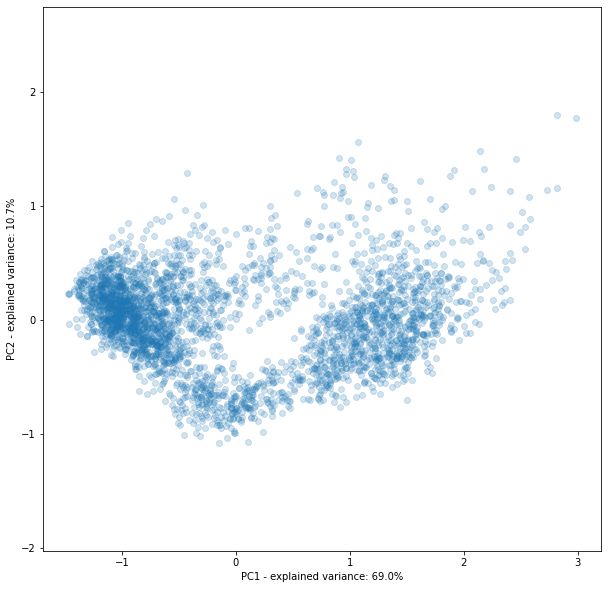

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
pc2plot = (1,2)
ax.scatter(X_pca[:, pc2plot[0]-1], X_pca[:, pc2plot[1]-1], alpha=0.2)
ax.axis('equal')
ax.set_xlabel("PC{} - explained variance: {}%".format(pc2plot[0], round(evr[pc2plot[0]-1]*100,1)))
ax.set_ylabel("PC{} - explained variance: {}%".format(pc2plot[1], round(evr[pc2plot[1]-1]*100,1)))

# Clustering lecture
* detail on k-means
* show example matrix and list of methods: https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods

#EX3 Clustering
apply
plot down-core
interpret in terms of PCA in general

# If time, PCA on clusters?

or what happens if filter data first?